In [13]:
import matplotlib.pyplot as plt
import numpy as np
from argoverse.map_representation.map_api import ArgoverseMap  # 如果需要可视化地图背景
import torch
import pytorch_lightning as pl
import numpy as np
from typing import Callable, Dict, List, Optional, Tuple, Union
from models.hivt import HiVT
from utils import TemporalData
import os 
import random
def plot_single_vehicle(
    avm: ArgoverseMap, 
    sample_past_trajectory: np.ndarray,  # (20, 2)
    sample_groundtruth: np.ndarray,  # (20, 2) 
    sample_forecasted_trajectories: List[np.ndarray],  # List[(30, 2)]
    sample_city_name: str, 
    ls: str):

    # sample_past_trajectory = np.concatenate((np.expand_dims(sample_past_trajectory[-1], axis=0), sample_past_trajectory), axis=0)
    #拼接最后一个点
    sample_groundtruth = np.concatenate((np.expand_dims(sample_past_trajectory[-1], axis=0), sample_groundtruth), axis=0)
    for sample_forecasted_trajectory in sample_forecasted_trajectories:
        sample_forecasted_trajectory = np.concatenate((np.expand_dims(sample_past_trajectory[-1], axis=0), sample_forecasted_trajectory), axis=0)
 
    ## Plot history
    obs_len = sample_past_trajectory.shape[0]
    pred_len = sample_groundtruth.shape[0]

    plt.plot(
        sample_past_trajectory[:, 0],
        sample_past_trajectory[:, 1],
        color="#ECA154",
        label="Past Trajectory",
        alpha=1,
        linewidth=1.5,
        zorder=15,
        ls = '-'
    )

    ## Plot future
    plt.plot(
        sample_groundtruth[:, 0],
        sample_groundtruth[:, 1],
        color="#d33e4c",
        label="Ground Truth",
        alpha=1,
        linewidth=1.5,
        zorder=20,
        ls = "--"
    )

    ## Plot prediction
    for j in range(len(sample_forecasted_trajectories)):
        plt.plot(
            sample_forecasted_trajectories[j][:, 0],
            sample_forecasted_trajectories[j][:, 1],
            color="#007672",
            label="Forecasted Trajectory",
            alpha=1,
            linewidth=1.2,
            zorder=15,
            ls = "--"
        )
        
        # Plot the end marker for forcasted trajectories
        plt.arrow(
            sample_forecasted_trajectories[j][-2, 0], 
            sample_forecasted_trajectories[j][-2, 1],
            sample_forecasted_trajectories[j][-1, 0] - sample_forecasted_trajectories[j][-2, 0],
            sample_forecasted_trajectories[j][-1, 1] - sample_forecasted_trajectories[j][-2, 1],
            color="#007672",
            label="Forecasted Trajectory",
            alpha=1,
            linewidth=2.5,
            zorder=15,
            head_width=1.1,
        )
    
    ## Plot the end marker for history
    plt.arrow(
            sample_past_trajectory[-2, 0], 
            sample_past_trajectory[-2, 1],
            sample_past_trajectory[-1, 0] - sample_past_trajectory[-2, 0],
            sample_past_trajectory[-1, 1] - sample_past_trajectory[-2, 1],
            color="#ECA154",
            label="Past Trajectory",
            alpha=1,
            linewidth=2.5,
            zorder=25,
            head_width=1.0,
        )

    ## Plot the end marker for future
    plt.arrow(
            sample_groundtruth[-2, 0], 
            sample_groundtruth[-2, 1],
            sample_groundtruth[-1, 0] - sample_groundtruth[-2, 0],
            sample_groundtruth[-1, 1] - sample_groundtruth[-2, 1],
            color="#d33e4c",
            label="Ground Truth",
            alpha=1,
            linewidth=2.5,
            zorder=25,
            head_width=1.0,
        )

    ## Plot history context
    for j in range(obs_len):
        lane_ids = avm.get_lane_ids_in_xy_bbox(
            sample_past_trajectory[j, 0],
            sample_past_trajectory[j, 1],
            sample_city_name,
            query_search_range_manhattan=3,
        )
        [avm.draw_lane(lane_id, sample_city_name) for lane_id in lane_ids]

    ## Plot future context
    for j in range(pred_len):
        lane_ids = avm.get_lane_ids_in_xy_bbox(
            sample_groundtruth[j, 0],
            sample_groundtruth[j, 1],
            sample_city_name,
            query_search_range_manhattan=3,
        )
        [avm.draw_lane(lane_id, sample_city_name) for lane_id in lane_ids]

In [14]:
model_unit = HiVT.load_from_checkpoint('/home/alon/Learning/HiVT/lightning_logs/version_26/checkpoints/epoch=63-step=659071.ckpt', parallel=True)
model_unit.eval()

HiVT(
  (local_encoder): LocalEncoder(
    (aa_encoder): AAEncoder(
      (center_embed): SingleInputEmbedding(
        (embed): Sequential(
          (0): Linear(in_features=2, out_features=64, bias=True)
          (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (2): ReLU(inplace=True)
          (3): Linear(in_features=64, out_features=64, bias=True)
          (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (5): ReLU(inplace=True)
          (6): Linear(in_features=64, out_features=64, bias=True)
          (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
      )
      (nbr_embed): MultipleInputEmbedding(
        (module_list): ModuleList(
          (0): Sequential(
            (0): Linear(in_features=2, out_features=64, bias=True)
            (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
            (2): ReLU(inplace=True)
            (3): Linear(in_features=64, out_features=64, bias=True)
          )
          (1):

In [15]:
am = ArgoverseMap()

送入模型的.pt数据格式与内容 cat


Loaded data from /home/alon/Learning/hivt_data/val/processed/14800.pt
agent_index= 14
av_index= 0
y_hat_agent.size =  torch.Size([47, 6, 30, 2])


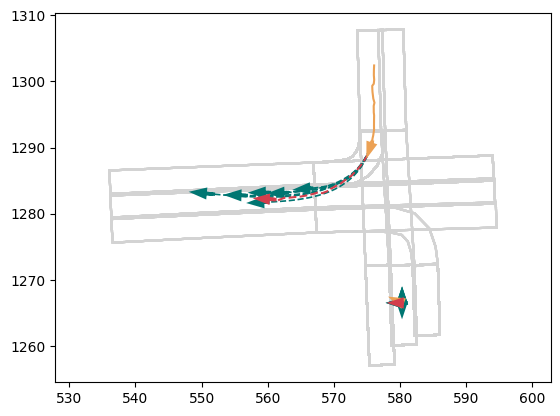

Loaded data from /home/alon/Learning/hivt_data/val/processed/7629.pt
agent_index= 19
av_index= 0
y_hat_agent.size =  torch.Size([34, 6, 30, 2])


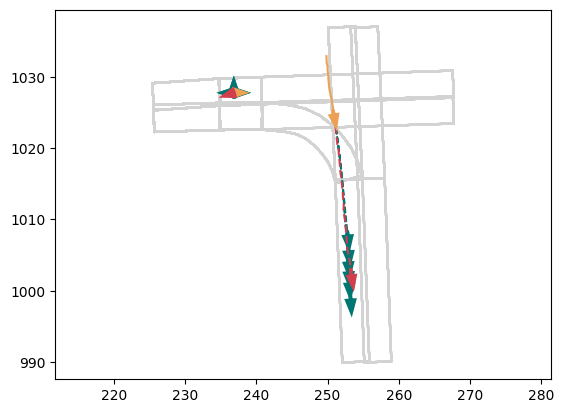

Loaded data from /home/alon/Learning/hivt_data/val/processed/40351.pt
agent_index= 15
av_index= 0
y_hat_agent.size =  torch.Size([32, 6, 30, 2])


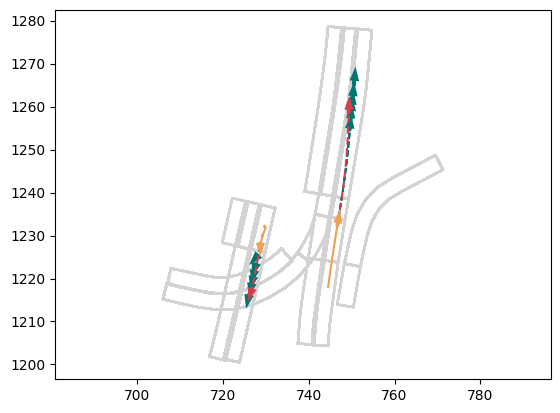

Loaded data from /home/alon/Learning/hivt_data/val/processed/24449.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([9, 6, 30, 2])


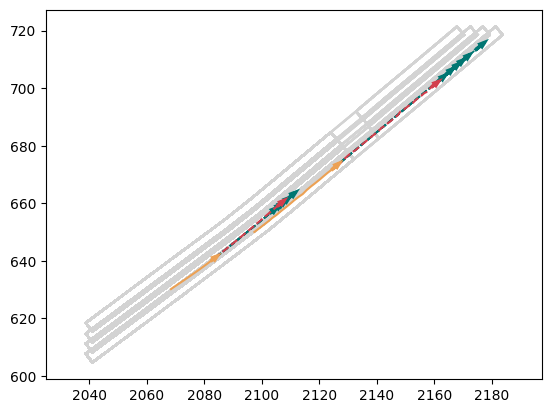

Loaded data from /home/alon/Learning/hivt_data/val/processed/58.pt
agent_index= 10
av_index= 0
y_hat_agent.size =  torch.Size([49, 6, 30, 2])


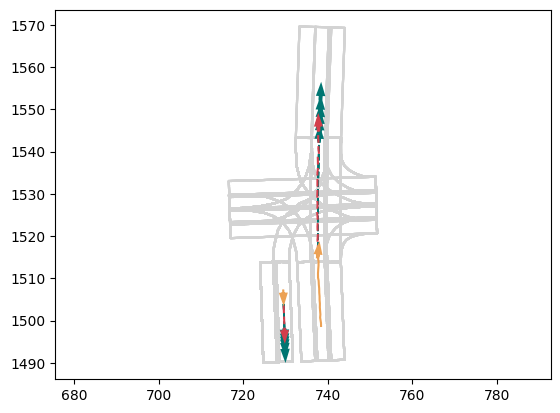

Loaded data from /home/alon/Learning/hivt_data/val/processed/28323.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([31, 6, 30, 2])


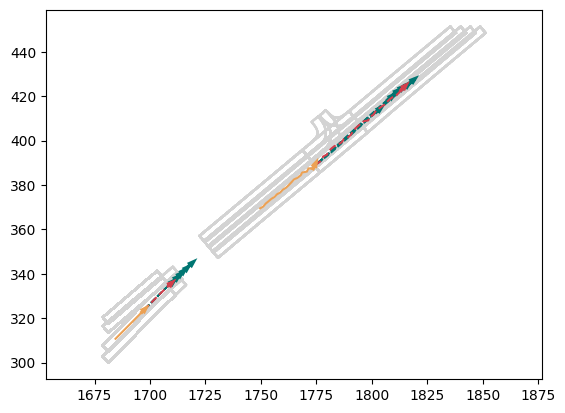

Loaded data from /home/alon/Learning/hivt_data/val/processed/10553.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([6, 6, 30, 2])


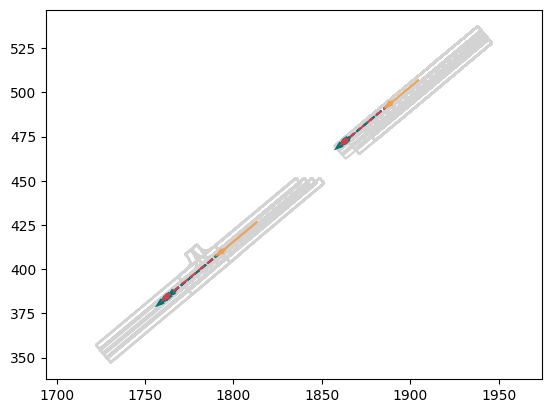

Loaded data from /home/alon/Learning/hivt_data/val/processed/1103.pt
agent_index= 7
av_index= 0
y_hat_agent.size =  torch.Size([17, 6, 30, 2])


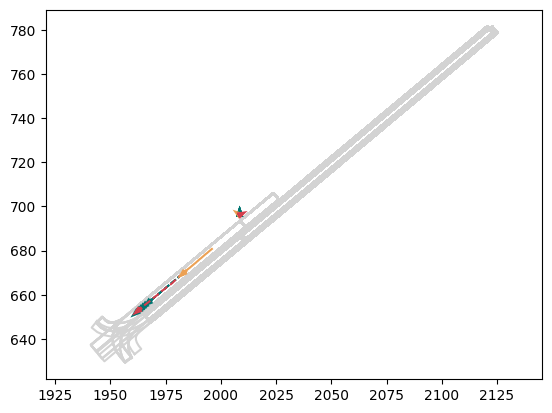

Loaded data from /home/alon/Learning/hivt_data/val/processed/32654.pt
agent_index= 8
av_index= 0
y_hat_agent.size =  torch.Size([18, 6, 30, 2])


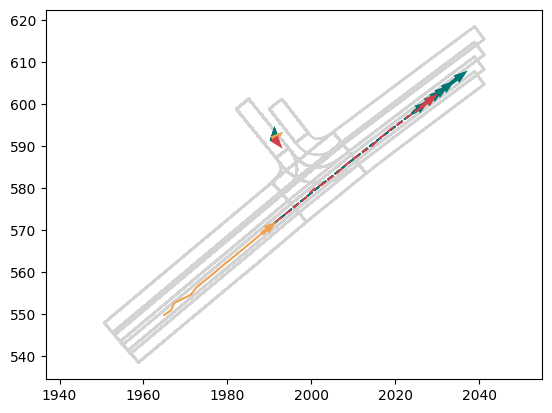

Loaded data from /home/alon/Learning/hivt_data/val/processed/40458.pt
agent_index= 21
av_index= 0
y_hat_agent.size =  torch.Size([51, 6, 30, 2])


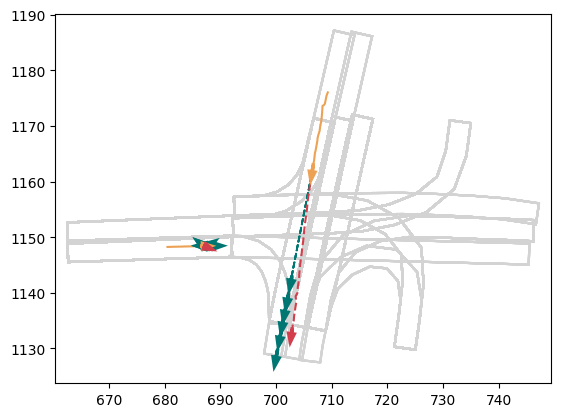

Loaded data from /home/alon/Learning/hivt_data/val/processed/12628.pt
agent_index= 14
av_index= 0
y_hat_agent.size =  torch.Size([43, 6, 30, 2])


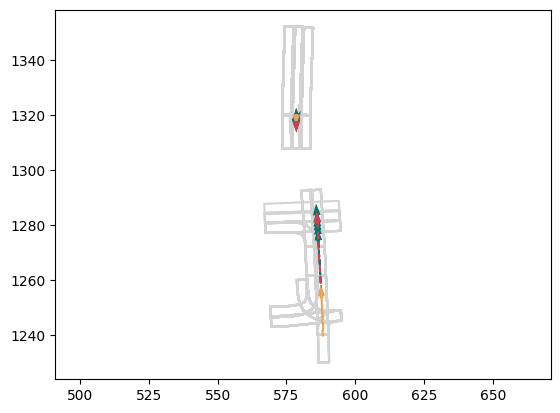

Loaded data from /home/alon/Learning/hivt_data/val/processed/38096.pt
agent_index= 3
av_index= 0
y_hat_agent.size =  torch.Size([12, 6, 30, 2])


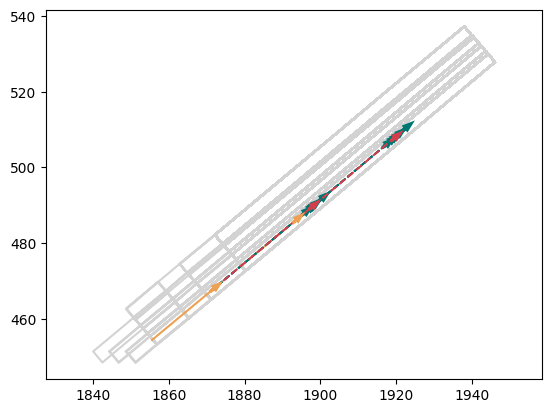

Loaded data from /home/alon/Learning/hivt_data/val/processed/15622.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([12, 6, 30, 2])


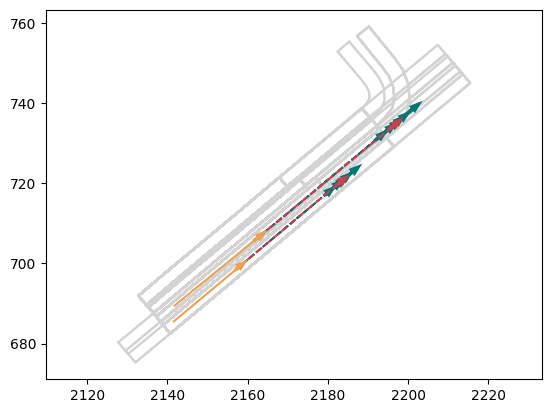

Loaded data from /home/alon/Learning/hivt_data/val/processed/5532.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([6, 6, 30, 2])


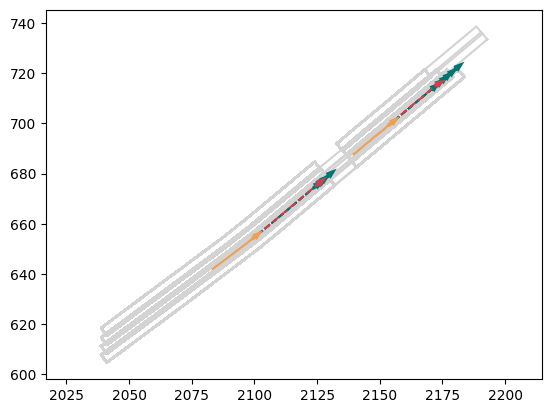

Loaded data from /home/alon/Learning/hivt_data/val/processed/39690.pt
agent_index= 5
av_index= 0
y_hat_agent.size =  torch.Size([27, 6, 30, 2])


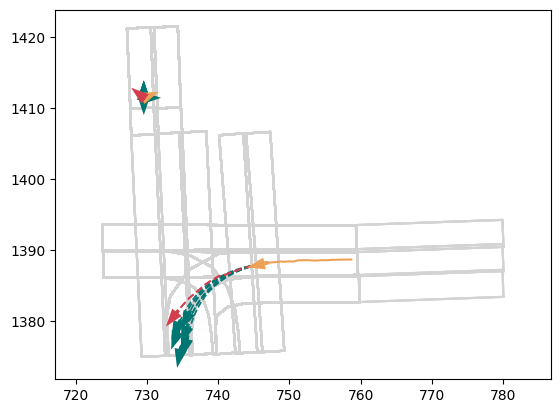

Loaded data from /home/alon/Learning/hivt_data/val/processed/311.pt
agent_index= 4
av_index= 0
y_hat_agent.size =  torch.Size([36, 6, 30, 2])


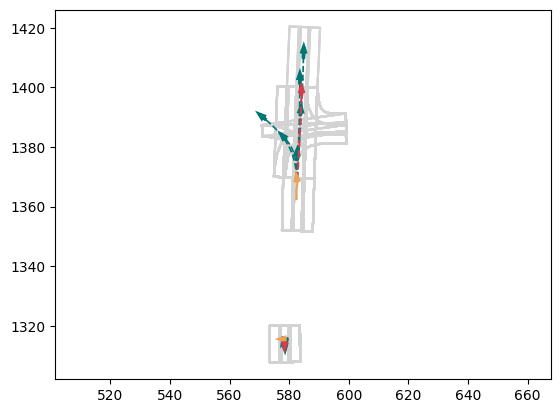

Loaded data from /home/alon/Learning/hivt_data/val/processed/20099.pt
agent_index= 8
av_index= 0
y_hat_agent.size =  torch.Size([29, 6, 30, 2])


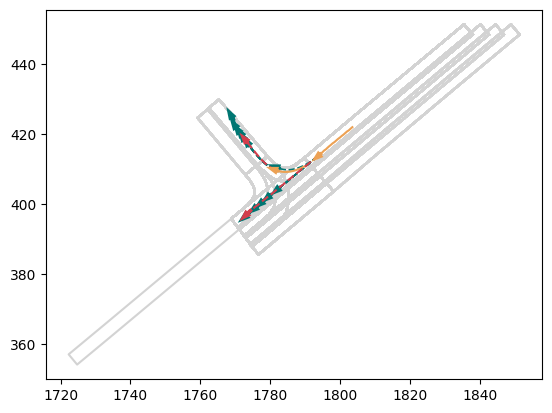

Loaded data from /home/alon/Learning/hivt_data/val/processed/16325.pt
agent_index= 10
av_index= 0
y_hat_agent.size =  torch.Size([23, 6, 30, 2])


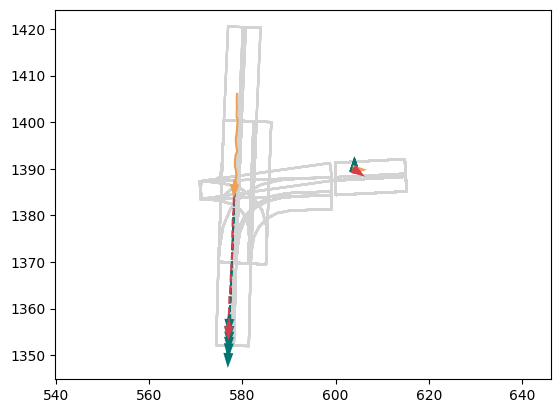

Loaded data from /home/alon/Learning/hivt_data/val/processed/35390.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([10, 6, 30, 2])


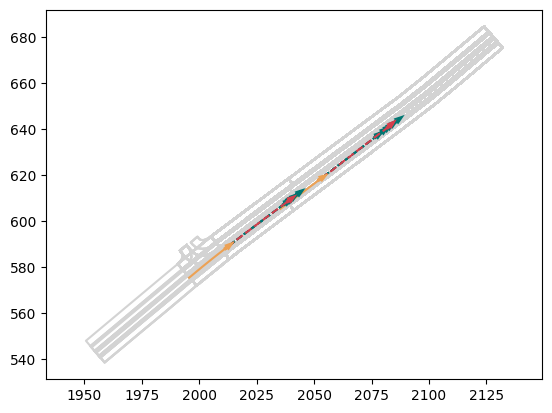

Loaded data from /home/alon/Learning/hivt_data/val/processed/11368.pt
agent_index= 6
av_index= 0
y_hat_agent.size =  torch.Size([20, 6, 30, 2])


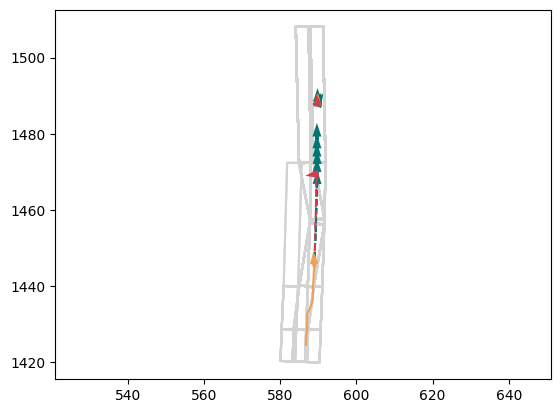

Loaded data from /home/alon/Learning/hivt_data/val/processed/16550.pt
agent_index= 4
av_index= 0
y_hat_agent.size =  torch.Size([15, 6, 30, 2])


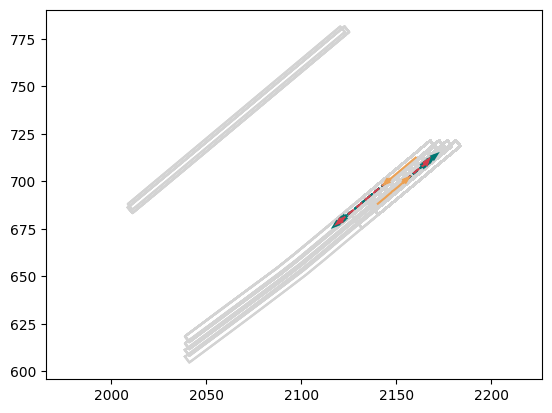

Loaded data from /home/alon/Learning/hivt_data/val/processed/21180.pt
agent_index= 7
av_index= 0
y_hat_agent.size =  torch.Size([17, 6, 30, 2])


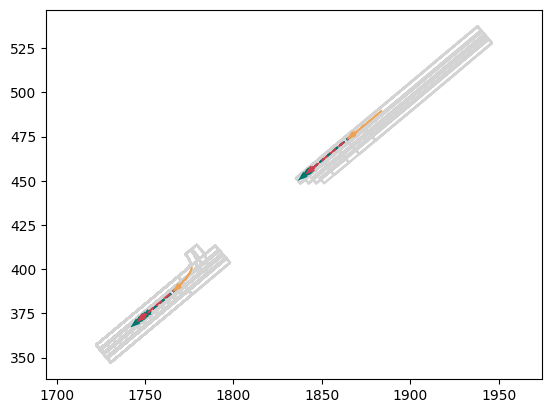

Loaded data from /home/alon/Learning/hivt_data/val/processed/11001.pt
agent_index= 7
av_index= 0
y_hat_agent.size =  torch.Size([22, 6, 30, 2])


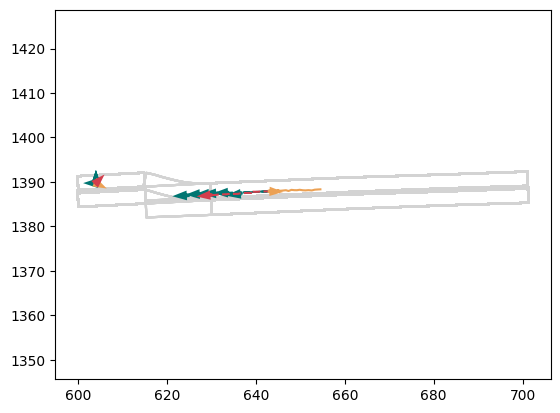

Loaded data from /home/alon/Learning/hivt_data/val/processed/1156.pt
agent_index= 3
av_index= 0
y_hat_agent.size =  torch.Size([19, 6, 30, 2])


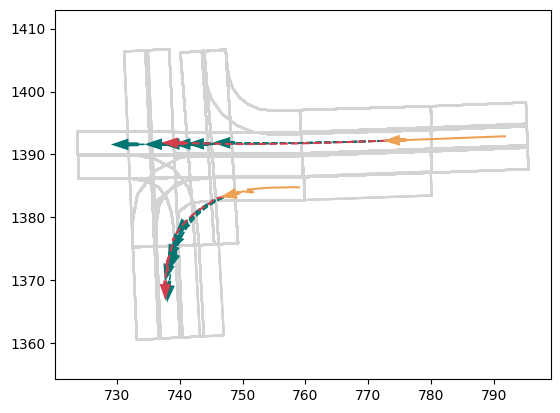

Loaded data from /home/alon/Learning/hivt_data/val/processed/25257.pt
agent_index= 3
av_index= 0
y_hat_agent.size =  torch.Size([17, 6, 30, 2])


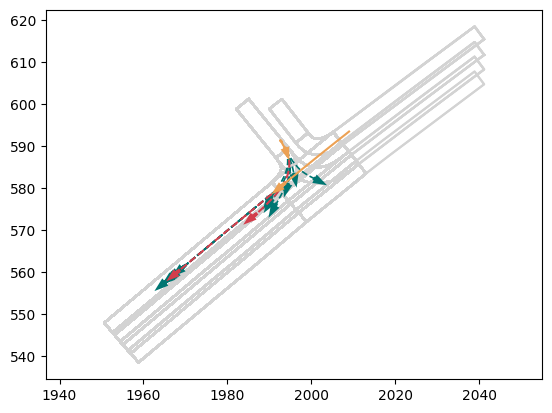

Loaded data from /home/alon/Learning/hivt_data/val/processed/4394.pt
agent_index= 6
av_index= 0
y_hat_agent.size =  torch.Size([22, 6, 30, 2])


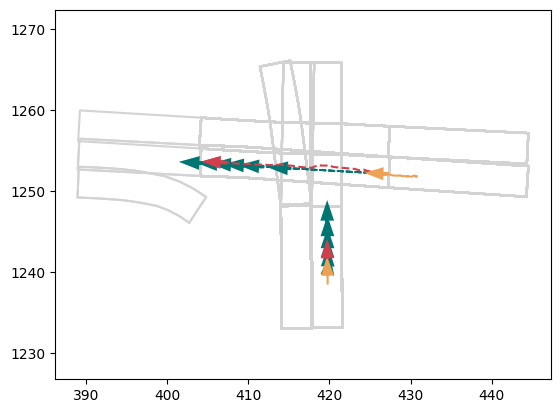

Loaded data from /home/alon/Learning/hivt_data/val/processed/9941.pt
agent_index= 10
av_index= 0
y_hat_agent.size =  torch.Size([19, 6, 30, 2])


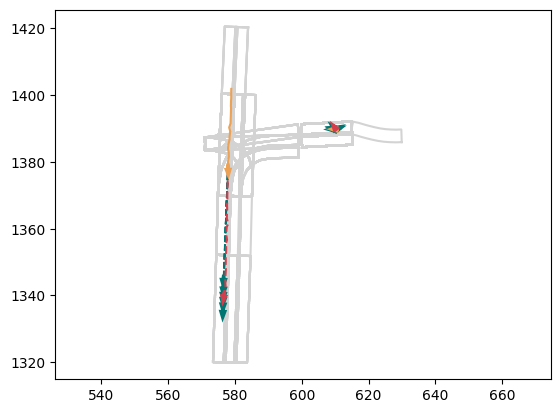

Loaded data from /home/alon/Learning/hivt_data/val/processed/10215.pt
agent_index= 1
av_index= 0
y_hat_agent.size =  torch.Size([15, 6, 30, 2])


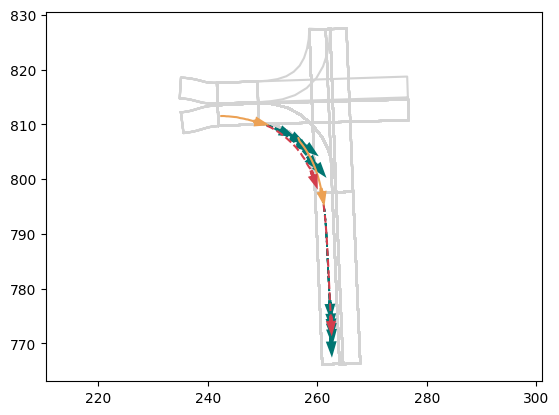

Loaded data from /home/alon/Learning/hivt_data/val/processed/30230.pt
agent_index= 7
av_index= 0
y_hat_agent.size =  torch.Size([9, 6, 30, 2])


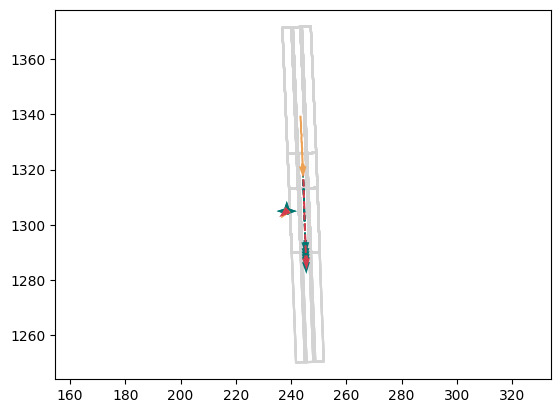

Loaded data from /home/alon/Learning/hivt_data/val/processed/32618.pt
agent_index= 18
av_index= 0
y_hat_agent.size =  torch.Size([31, 6, 30, 2])


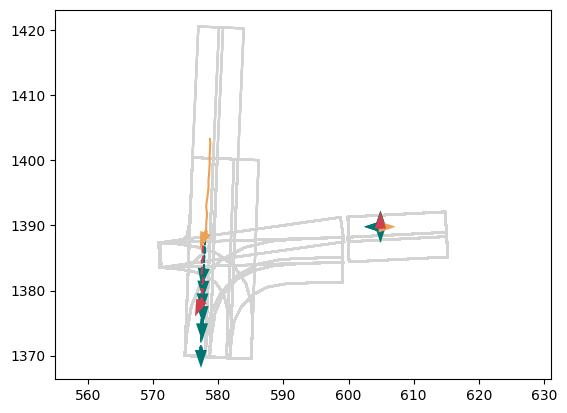

Loaded data from /home/alon/Learning/hivt_data/val/processed/35233.pt
agent_index= 25
av_index= 0
y_hat_agent.size =  torch.Size([35, 6, 30, 2])


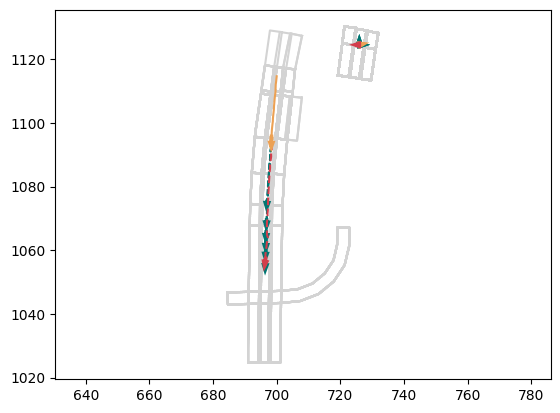

Loaded data from /home/alon/Learning/hivt_data/val/processed/4345.pt
agent_index= 2
av_index= 0
y_hat_agent.size =  torch.Size([33, 6, 30, 2])


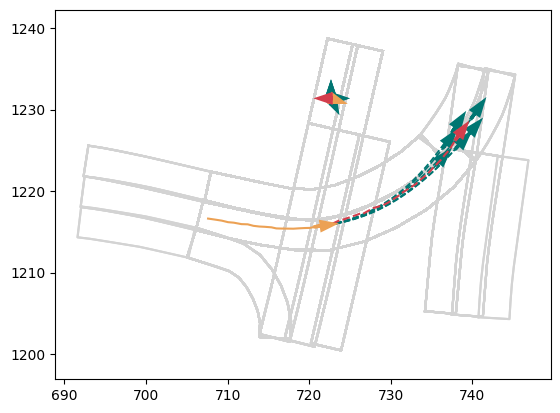

Loaded data from /home/alon/Learning/hivt_data/val/processed/36503.pt
agent_index= 2
av_index= 0
y_hat_agent.size =  torch.Size([9, 6, 30, 2])


KeyboardInterrupt: 

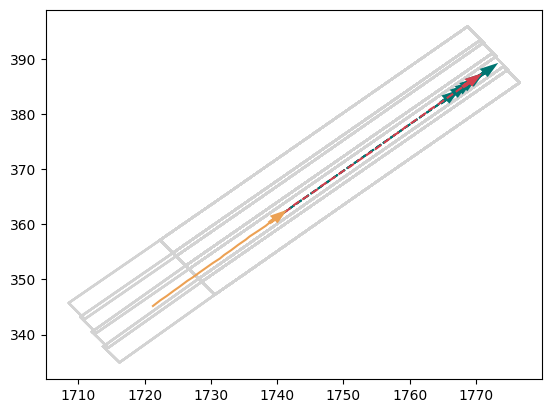

In [16]:
# 设置处理后数据的目录路径
processed_dir = '/home/alon/Learning/hivt_data/val/processed'
file_names = os.listdir(processed_dir)
cnt = 0
random.seed(2024)
random.shuffle(file_names)
# 循环加载每个 '.pt' 文件 100个随机
for file_name in file_names:
    # 构造完整的文件路径
    file_path = os.path.join(processed_dir, file_name)
    # 加载文件内容
    test_data = torch.load(file_path)
    # 执行所需的操作，例如打印或处理数据
    print(f"Loaded data from {file_path}")
    print('agent_index=',test_data['agent_index'])
    print('av_index=',test_data['av_index'])
    cnt += 1
    if cnt>100:
        break
    with torch.no_grad(): 
        y_hat_agent, pi_agent, seq_id ,position_sce= model_unit.predition_unit_batch(test_data,batch_idx=0)
    y_hat_agent = y_hat_agent.permute(0, 1, 2, 3)
    print('y_hat_agent.size = ',y_hat_agent.size())
    pred_traj_np = y_hat_agent.cpu().numpy()
    full_traj = position_sce
    if full_traj.is_cuda:
        full_traj = full_traj.cpu()
    # 转换为 NumPy 数组
    full_traj_np = full_traj.numpy()
    
    index_agent = test_data['agent_index']
    av_agent = test_data['av_index']

    actor_to_show = index_agent
    sample_past_trajectory = full_traj[actor_to_show,:20,:]
    sample_groundtruth = full_traj[actor_to_show,20:,:]
    full_truth = full_traj_np[actor_to_show]
    sample_forecasted_trajectories = [pred_traj_np[actor_to_show][i] for i in range(pred_traj_np.shape[1])]
    #橙色是历史轨迹
    #绿色是预测轨迹
    #红色是真实轨迹
    plot_single_vehicle(am,sample_past_trajectory,sample_groundtruth,sample_forecasted_trajectories,test_data.city,'-.')
    actor_to_show = av_agent
    sample_past_trajectory = full_traj[actor_to_show,:20,:]
    sample_groundtruth = full_traj[actor_to_show,20:,:]
    full_truth = full_traj_np[actor_to_show]
    sample_forecasted_trajectories = [pred_traj_np[actor_to_show][i] for i in range(pred_traj_np.shape[1])]
    plot_single_vehicle(am,sample_past_trajectory,sample_groundtruth,sample_forecasted_trajectories,test_data.city,'-.')
    plt.show()
    plt.close()
